<a href="https://colab.research.google.com/github/sitimarufatus/virtual_internship/blob/main/Home_Credit_Credit_Score_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

Load data

In [3]:
application_train = pd.read_csv('/content/drive/MyDrive/home-credit-default-risk/application_train.csv')
application_test = pd.read_csv('/content/drive/MyDrive/home-credit-default-risk/application_test.csv')

In [4]:
print("application_train -  rows:",application_train.shape[0]," columns:", application_train.shape[1])
print("application_test -  rows:",application_test.shape[0]," columns:", application_test.shape[1])

application_train -  rows: 307511  columns: 122
application_test -  rows: 48744  columns: 121


In [5]:
#application_train
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [7]:
# application_test
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
application_test.columns.values

array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG'

Missing Value

In [9]:
print(application_train.isnull().sum().head(10))

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY           12
dtype: int64


In [10]:
print(application_test.isnull().sum().head(10))

SK_ID_CURR             0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY           24
AMT_GOODS_PRICE        0
dtype: int64


Handling Missing Value

In [11]:
application_train = application_train.fillna(application_train.mode())

In [12]:
application_train = application_train.fillna(application_train.median())

<ipython-input-12-6721ca0fdceb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_train = application_train.fillna(application_train.median())


In [13]:
application_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [14]:
application_test = application_test.fillna(application_test.mode())

In [15]:
application_test = application_test.fillna(application_test.median())

<ipython-input-15-6af4d6849375>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  application_test = application_test.fillna(application_test.median())


In [16]:
application_test.isna().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

Check imbalanced data

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


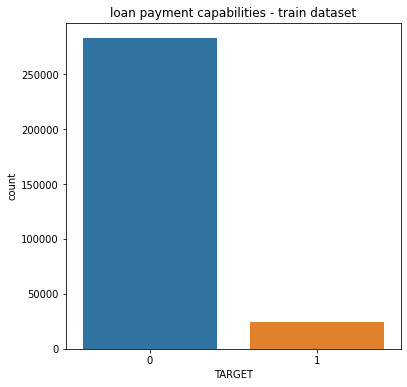

In [17]:
plt.figure(figsize=(6,6))
plt.title('loan payment capabilities - train dataset')
sns.countplot(application_train['TARGET'])
plt.show()


loan repayment ability based on age

<AxesSubplot:xlabel='TARGET', ylabel='count'>

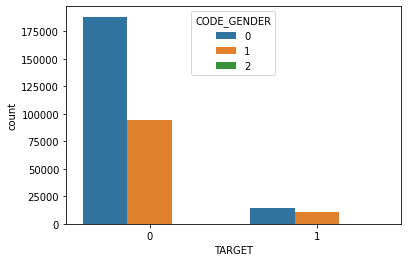

In [40]:
sns.countplot(x='TARGET',hue='CODE_GENDER',data=application_train)

loan repayment ability based on income type

<AxesSubplot:xlabel='TARGET', ylabel='count'>

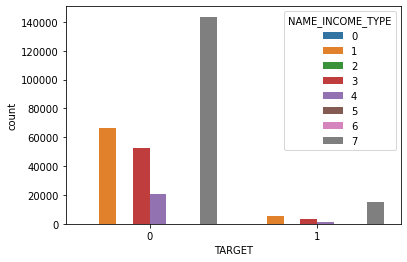

In [36]:
sns.countplot(x='TARGET',hue='NAME_INCOME_TYPE',data=application_train)

loan repayment ability based on name family status

<AxesSubplot:xlabel='TARGET', ylabel='count'>

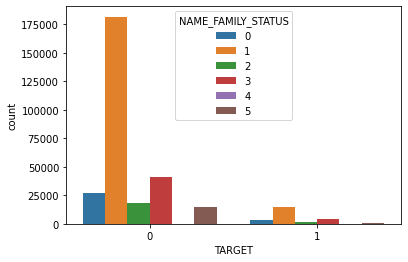

In [37]:
sns.countplot(x='TARGET',hue='NAME_FAMILY_STATUS',data=application_train)

loan repayment ability based on age name housing type

<AxesSubplot:xlabel='TARGET', ylabel='count'>

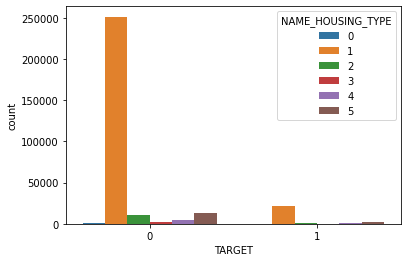

In [38]:
sns.countplot(x='TARGET',hue='NAME_HOUSING_TYPE',data=application_train)

Modelling

In [18]:
application_train = application_train.apply(LabelEncoder().fit_transform)

In [19]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,0,1,0,1,0,1754,1191,4588,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,2064,4338,6985,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,1,1,1,0,338,228,662,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,1,0,1170,836,5680,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,1,0,1,0,1019,1635,3960,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,307506,0,0,1,0,0,0,1407,612,5217,...,0,0,0,0,0,0,0,0,0,1
307507,307507,0,0,0,0,1,0,387,672,1792,...,0,0,0,0,0,0,0,0,0,1
307508,307508,0,0,0,0,1,0,1371,2270,5744,...,0,0,0,0,1,0,0,1,0,1
307509,307509,1,0,0,0,1,0,1519,1049,3593,...,0,0,0,0,0,0,0,0,0,0


In [20]:
application_test = application_test.apply(LabelEncoder().fit_transform)

In [21]:
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,0,0,1,0,272,1320,2344,276,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,181,379,1820,93,...,0,0,0,0,0,0,0,0,0,3
2,2,0,1,1,1,0,402,1548,7132,366,...,0,0,0,0,0,0,0,0,1,4
3,3,0,0,0,1,2,492,2731,6049,628,...,0,0,0,0,0,0,0,0,0,3
4,4,0,1,1,0,1,366,1456,4108,365,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,48739,0,0,0,1,0,243,903,1839,161,...,0,0,0,0,0,0,0,0,0,1
48740,48740,0,0,0,0,2,325,1452,4086,304,...,0,0,0,0,0,0,0,0,0,2
48741,48741,0,0,1,1,1,402,629,4257,195,...,0,0,0,0,0,0,0,0,3,1
48742,48742,0,1,0,0,0,434,998,3079,276,...,0,0,0,0,0,0,0,0,0,2


In [22]:
x=application_train.drop(['SK_ID_CURR','TARGET'], axis=1)
print(x)
y=application_train['TARGET']
print(y)

        NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                        0            1             0                1   
1                        0            0             0                0   
2                        1            1             1                1   
3                        0            0             0                1   
4                        0            1             0                1   
...                    ...          ...           ...              ...   
307506                   0            1             0                0   
307507                   0            0             0                1   
307508                   0            0             0                1   
307509                   0            0             0                1   
307510                   0            0             0                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0              1754      

In [23]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=.30, random_state=1)

In [24]:
x_test = application_test.drop(['SK_ID_CURR'], axis = 1)

linear regression model

In [25]:
lr = LogisticRegression(max_iter=3000)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_valid)

lr_train_score = lr.score(x_train, y_train)
lr_test_score= lr.score(x_valid, y_valid)


lr_acc = accuracy_score(y_pred_lr,y_valid)

pred_lr=lr.predict(x_test)
print(pred_lr)
print('LogisticRegressionModel Train Score is : ' , lr_train_score)
print('LogisticRegressionModel Test Score is : ' , lr_test_score)
print('LogisticRegressionModel accuracy is : ', lr_acc)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 0 ... 0 0 0]
LogisticRegressionModel Train Score is :  0.9192082022884274
LogisticRegressionModel Test Score is :  0.918930344483708
LogisticRegressionModel accuracy is :  0.918930344483708


In [26]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators = 15, random_state = 2, verbose = 0, n_jobs = None)
rf.fit(x_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=15, random_state=2)

In [28]:
y_pred_rf = rf.predict(x_valid)

rf_train_score = rf.score(x_train, y_train)
rf_test_score= rf.score(x_valid, y_valid)

rf_acc = accuracy_score(y_pred_rf,y_valid)

pred_rf=rf.predict(x_test)
print(pred_rf)

print('RandomForestClassifier Train Score : ' , rf_train_score)
print('RandomForestClassifier Test Score : ' , rf_test_score)
print('RandomForestClassifier accuracy : ', rf_acc)

[0 0 0 ... 0 0 0]
RandomForestClassifier Train Score :  0.9943509386454331
RandomForestClassifier Test Score :  0.9183666832874455
RandomForestClassifier accuracy :  0.9183666832874455


In [29]:
models = ['LogisticRegression', 'RandomForestClassifier']
model_data = [lr_acc, rf_acc]
cols = ['accuracy_score']
compare_model = pd.DataFrame(data=model_data, index=models, columns=cols)
compare_model.sort_values(ascending=False, by= ['accuracy_score'])

,accuracy_score
LogisticRegression,0.918930
RandomForestClassifier,0.918367


Text(0, 0.5, 'Accuracy_Score')

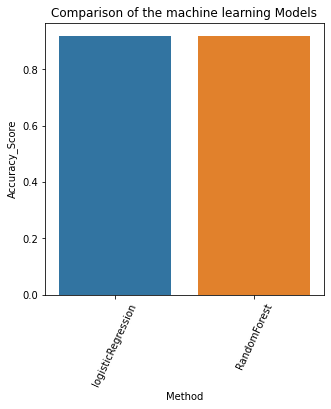

In [31]:
name = ['logisticRegression','RandomForest']
auc = [0.918930, 0.918367]
plt.figure(figsize=(5,5))
sns.barplot(x=name,y=auc)
plt.xticks(rotation=65)
plt.title('Comparison of the machine learning Models')
plt.xlabel('Method')
plt.ylabel('Accuracy_Score')

In [32]:
submission = pd.DataFrame({ 'SK_ID_CURR': application_test['SK_ID_CURR'],
                            'TARGET': pred_lr })
submission.to_csv("Submission.csv", index=False)

In [34]:
submission

,SK_ID_CURR,TARGET
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
48739,48739,0
48740,48740,0
48741,48741,0
48742,48742,0
